In [1]:
"""
a toy example of using skopt to implement BO;

1. check transformation
2. implement BO
"""
import numpy as np
import matplotlib.pyplot as plt
import copy

from transformation import transformer
from transformation import fake_api

##### transformation

In [2]:
X = np.array([ 
    [10,21,39,12,14],
    [42,52,63,11,54],
    [71,82,99,42,57],
    [15,24,67,78,93]
]) 
N = np.sum(X,axis=1)

In [3]:
Y = transformer.x_to_y(X)
Y

array([[0.10416667, 0.24418605, 0.6       , 0.46153846],
       [0.18918919, 0.28888889, 0.4921875 , 0.16923077],
       [0.2022792 , 0.29285714, 0.5       , 0.42424242],
       [0.05415162, 0.09160305, 0.28151261, 0.45614035]])

In [4]:
re_X= transformer.y_to_x(Y,N)
re_X

array([[10, 21, 39, 12, 14],
       [42, 52, 63, 11, 54],
       [71, 82, 99, 42, 57],
       [15, 24, 67, 78, 93]])

##### fake api

In [5]:
fake_api.fake_margin(Y)

[9.228798106162184, 9.445988731471887, 9.07384123867117, 9.383206360370668]

# optimise with scikit-optimise packages

In [17]:
import sys
# sys.path.append("/usr/local/lib/python3.7/site-packages")
import skopt
# in practice, we directly with initial guess y_0 = Y
y_0 = copy.deepcopy(Y).reshape(-1)
y_0

array([0.10416667, 0.24418605, 0.6       , 0.46153846, 0.18918919,
       0.28888889, 0.4921875 , 0.16923077, 0.2022792 , 0.29285714,
       0.5       , 0.42424242, 0.05415162, 0.09160305, 0.28151261,
       0.45614035])

##### Gp minimize

In [22]:
from skopt import gp_minimize

"""
x0: initial guess; must be in the form of list
y0: a scalar
"""

bounds = [(0,1)]*Y.shape[0]*Y.shape[1]

obj_min = lambda x: fake_api.fake_margin(x,4,5)

res = gp_minimize(obj_min,                  # the function to minimize
                  bounds,                   # the bounds on each dimension of x
                  acq_func="gp_hedge",      # Probabilistically choose one of the above three acquisition functions
                  n_calls=100,              # the number of evaluations of f
                  n_random_starts=10,       # the number of random initialization points
                  x0 = y_0.tolist(),        # initial guess
                  y0= obj_min(y_0),         # initial evaluation
                  noise=0,                  # the noise level (optional)
                  random_state=1234)        # the random seed

/usr/local/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr/local/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr/local/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr/local/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr/local/lib/python3.7/site-packages/skopt/optimizer/optimizer.py:409: UserWarning: The objective has been evaluated at this point before.
  warnings.warn("The objective has been evaluated "
/usr/local/lib/python3.7/site-packa

In [23]:
print("results:",res.x,res.fun)

results: [0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0] 10.20515133093744


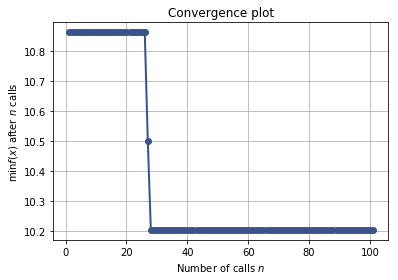

In [24]:
from skopt.plots import plot_convergence
plot_convergence(res)